# Analyzing MovieLens data 
In this notebook I am going to analyze the MOvieLens data that can be found on kaggle
link -  https://www.kaggle.com/grouplens/movielens-20m-dataset

I chose this dataset because I was intrested in movies and how often movies get high ratings

My blog post can be found on https://medium.com/@VaibhavKumarTiwari/what-movies-data-set-wants-to-say-562b1189ecf8


#### Business Understanding
Based on the data available can we find 

1)Most popular genres

2)Top 10 highly rated movies

3)How ratings are distributed

In [1]:
# importing the Libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
# Getting the movie data set
movies= pd.read_csv('movies.csv')
ratings_df= pd.read_csv('ratings.csv')

### Data Understanding

In [3]:
#getting the shape of our movies dataframe
movies.shape

(62423, 3)

In [4]:
# Descriptive Statistics
movies.describe()

,movieId
count,62423.000000
mean,122220.387646
std,63264.744844
min,1.000000
25%,82146.500000
50%,138022.000000
75%,173222.000000
max,209171.000000


In [5]:
# Getting the data type and null values in our dataset
movies.info()
#So the data contains no null values in movies data fram 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
movieId    62423 non-null int64
title      62423 non-null object
genres     62423 non-null object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [6]:
# knowing the content present in the dataset
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
# now data understanding of ratings dataframe

In [8]:
#getting the shape of our movies dataframe
ratings_df.shape

(25000095, 4)

In [9]:
# knowing the content present in the dataset
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [10]:
# Getting the data type and null values in our dataset
ratings_df.info()
#So the data contains no null values in movies data fram 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


In [11]:
# Descriptive Statistics
movies.describe()

,movieId
count,62423.000000
mean,122220.387646
std,63264.744844
min,1.000000
25%,82146.500000
50%,138022.000000
75%,173222.000000
max,209171.000000


### Data preparation


In [12]:
# Luckily our data contains no null values and our data set is quiet well structures
# All we need to do is two task
#        1)add a new column 'Year' in the movies dataset
#        2)Add new genres dataframe

In [13]:
# adding year column from movie data
movies['year'] =movies['title'].str.extract('.*\((.*)\).*',expand = False)
movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
62418,209157,We (2018),Drama,2018
62419,209159,Window of the Soul (2001),Documentary,2001
62420,209163,Bad Poems (2018),Comedy|Drama,2018
62421,209169,A Girl Thing (2001),(no genres listed),2001


### Modeling data

In [14]:
# now the goal is to find out how many times each genres appear
genres_df=movies['genres'].str.split('|',expand=True)   
genres_df

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
62418,Drama,None,None,None,None,None,None,None,None,None
62419,Documentary,None,None,None,None,None,None,None,None,None
62420,Comedy,Drama,None,None,None,None,None,None,None,None
62421,(no genres listed),None,None,None,None,None,None,None,None,None


In [15]:
# this code below finds the number of occurence of a genres in the data set
# it returns dictionary item with kes as genres name and value as the number of occurence

counter_dict={}

for i in range(10):
    for j in range(62423):    
        if genres_df[i][j] == None:
            continue
        if genres_df[i][j] not in counter_dict.keys():
                counter_dict[genres_df[i][j]]=1
        else:
            counter_dict[genres_df[i][j]]+=1
        
print(counter_dict)

{'Adventure': 4145, 'Comedy': 16870, 'Action': 7348, 'Drama': 25606, 'Crime': 5319, 'Children': 2935, 'Mystery': 2925, 'Documentary': 5605, 'Animation': 2929, 'Thriller': 8654, 'Horror': 5989, 'Fantasy': 2731, 'Western': 1399, 'Film-Noir': 353, 'Romance': 7719, 'War': 1874, 'Sci-Fi': 3595, 'Musical': 1054, 'IMAX': 195, '(no genres listed)': 5062}


# 1 Which is the most popular genres

In [16]:
# to plot the data we need to change data type from dictionary to panda series
plotting_data=pd.Series(counter_dict)

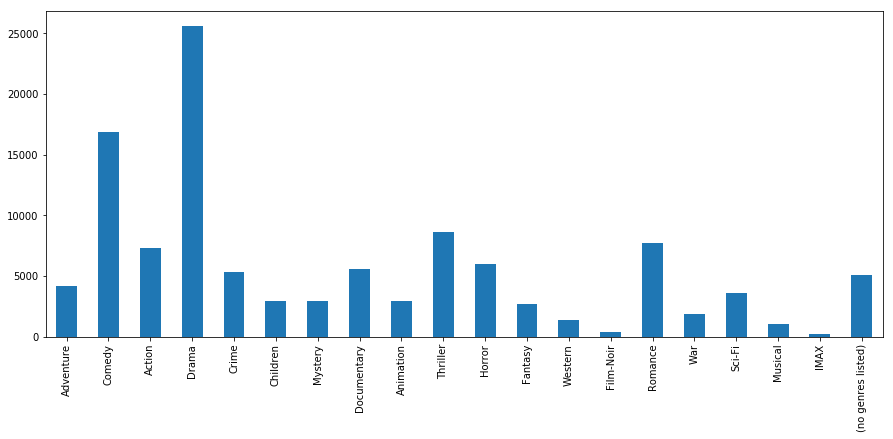

In [17]:
plotting_data.plot(kind='bar',figsize=(15,6));

# 2 What are the top 10 highly rated movies
Our goal is to find highly rated movie with minimum 50 reviews
and plotting its bargraph

In [18]:
# Importing the data set 
ratings_df= pd.read_csv('ratings.csv')
movies= pd.read_csv('movies.csv')

In [19]:
#Adding and renaming columns of min max and mean 
ratings_df = ratings_df \
    .groupby('movieId') \
    .agg({'rating': ['size', 'min', 'max', 'mean']})

ratings_df.columns = ['_'.join(col) \
                           for col in ratings_df.columns]

In [20]:
useful=ratings_df[ratings_df['rating_size']>50]
useful=useful.sort_values(by=['rating_mean']).tail(10)

In [21]:
top_movies=pd.merge(useful,movies,how='inner',on='movieId')
plotting_data=top_movies.drop(['rating_size','rating_min','rating_max','genres','movieId'],axis=1)

In [22]:
plotting_data=plotting_data.sort_values(by='rating_mean',ascending=False)

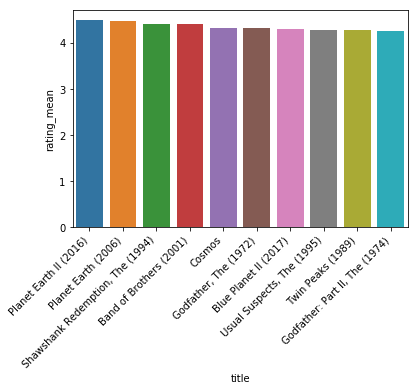

In [23]:
chart=sns.barplot(x=plotting_data['title'],y=plotting_data['rating_mean'],)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right');

# 3 How ratings are distributed

We are looking if all ratings get equal number of reviews

In [24]:
ratings_df= pd.read_csv('ratings.csv')

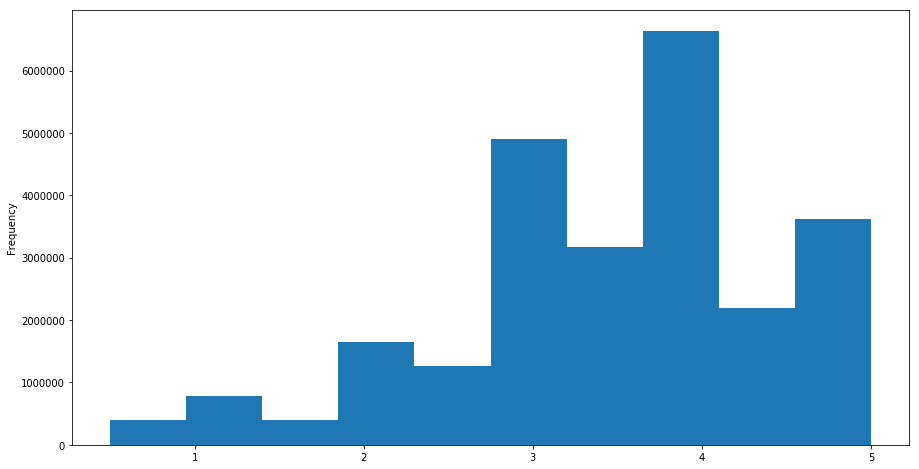

In [25]:
ratings_df['rating'].plot(kind='hist',figsize=(15,8));